## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import pairwise_distances
%matplotlib inline

## The Datas

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
# data preparing
df_train = train_normal[(train_normal.simulationRun>=1)].iloc[:500,3:]

df_test = train_normal[(train_normal.simulationRun>5)&(train_normal.simulationRun<10)].iloc[:,3:].reset_index(drop=True)
# IDV = 1
# df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
#                                (test_faulty.simulationRun==1)].iloc[:,3:]

## Scaling Training Datas

In [5]:
def scl_pick(name, data):
    """
    the several option for name:
    -std
    -minmax
    -robust
    -norm
    -pwr
    """
    if name == 'std':
        std_scl = StandardScaler().fit(data)
        df_scl = std_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'minmax':
        MM_scl = MinMaxScaler().fit(data)
        df_scl = MM_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'robust':
        rb_scl = RobustScaler().fit(data)
        df_scl = rb_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'norm': ##### xxxxxx
        df_norm = Normalizer().fit(data)
        df_scl = df_norm.transform(data)
        df_scl = pd.DataFrame(df_scl)
    else:
        pt_scl = PowerTransformer().fit(data)
        df_scl = pt_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    return df_scl

### Important Parameters

In [6]:
nComponent = 16 # 30
nSamples = df_train.shape[0]
conf_T2 = 0.95 # 0.99

In [7]:
df_scl = scl_pick('std', df_train)

### Kernel prosess

In [8]:
def kernelFunc(name, data):
    """
    - Linear : lin
    - Gaussian : gauss
    - Polynomial : poly
    - Sigmoid : sig
    - Laplacian : lap
    """
    gamma = 0.1
    offset = 0
    x = data
    Kdat = pd.DataFrame()
    if name == 'lin':
        lin = x@x.T
        Kdat = lin
        
    elif name == 'gauss':
        pdist_gs = pairwise_distances(x, x, metric='sqeuclidean')
        gaus = np.exp(-gamma*pdist_gs)
        Kdat = gaus
        
    elif name == 'poly':
        poly = gamma*x@x.T+offset
        powr = np.power(poly,2)
        fpoly = poly+powr
        Kdat = fpoly
        
    elif name == 'sig':
        sig = gamma*x@x.T+offset
        fsig = np.tanh(sig)
        Kdat = fsig
        
    elif name == 'lap':
        pdist_lap = pairwise_distances(x, x, metric='cityblock')
        lap = np.exp(-gamma*pdist_lap)
        Kdat = lap
        
    return Kdat

In [9]:
K = kernelFunc('gauss', df_scl)

In [10]:
K

array([[1.00000000e+00, 5.54932851e-02, 2.26569364e-02, ...,
        2.30713244e-02, 8.62905812e-03, 1.19570302e-03],
       [5.54932851e-02, 1.00000000e+00, 1.03695024e-02, ...,
        1.74256530e-03, 1.29295960e-03, 9.08310915e-04],
       [2.26569364e-02, 1.03695024e-02, 1.00000000e+00, ...,
        9.49673322e-04, 1.83007699e-03, 1.84790770e-04],
       ...,
       [2.30713244e-02, 1.74256530e-03, 9.49673322e-04, ...,
        1.00000000e+00, 5.64087945e-03, 3.16629433e-04],
       [8.62905812e-03, 1.29295960e-03, 1.83007699e-03, ...,
        5.64087945e-03, 1.00000000e+00, 2.56041057e-02],
       [1.19570302e-03, 9.08310915e-04, 1.84790770e-04, ...,
        3.16629433e-04, 2.56041057e-02, 1.00000000e+00]])

In [11]:
K = pd.DataFrame(K)

In [12]:
K

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,0.055493,0.022657,0.010941,0.023858,0.001381,0.019208,0.018695,0.003590,0.002288,...,0.005842,0.006589,0.000141,0.001106,0.002677,0.000671,0.009283,0.023071,0.008629,0.001196
1,0.055493,1.000000,0.010370,0.039117,0.006139,0.000465,0.041069,0.022649,0.001311,0.001810,...,0.004012,0.002414,0.000328,0.000312,0.003630,0.018625,0.032595,0.001743,0.001293,0.000908
2,0.022657,0.010370,1.000000,0.148497,0.001131,0.000467,0.007500,0.020643,0.000207,0.000777,...,0.003683,0.002100,0.001233,0.000027,0.003554,0.000851,0.002856,0.000950,0.001830,0.000185
3,0.010941,0.039117,0.148497,1.000000,0.000827,0.000180,0.015579,0.012576,0.000171,0.000308,...,0.002323,0.001750,0.000763,0.000103,0.001610,0.004674,0.003269,0.000312,0.000449,0.000438
4,0.023858,0.006139,0.001131,0.000827,1.000000,0.044640,0.000736,0.000296,0.000516,0.000201,...,0.000475,0.000656,0.000011,0.000029,0.000366,0.000174,0.000925,0.002215,0.000280,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000671,0.018625,0.000851,0.004674,0.000174,0.000017,0.001356,0.000732,0.000360,0.000449,...,0.000240,0.000071,0.000094,0.000007,0.010492,1.000000,0.004482,0.000088,0.001573,0.000486
496,0.009283,0.032595,0.002856,0.003269,0.000925,0.000093,0.002506,0.002536,0.000107,0.000086,...,0.001392,0.000755,0.000284,0.000063,0.000761,0.004482,1.000000,0.063521,0.002098,0.000148
497,0.023071,0.001743,0.000950,0.000312,0.002215,0.000108,0.000444,0.000282,0.000113,0.000012,...,0.000244,0.000657,0.000266,0.000356,0.000125,0.000088,0.063521,1.000000,0.005641,0.000317
498,0.008629,0.001293,0.001830,0.000449,0.000280,0.000063,0.000822,0.000533,0.000528,0.000065,...,0.000233,0.000053,0.000311,0.000029,0.001937,0.001573,0.002098,0.005641,1.000000,0.025604


In [13]:
s = (len(df_scl),len(df_scl))
unit = np.ones(s)/len(df_scl)

In [14]:
K_c = K-unit@K-K@unit+unit@K@unit

In [15]:
# Compute Eigenvalues and Eigenvector
# eigvls, eigvct = np.linalg.eig(K_c) # K_c
u, s, vh = np.linalg.svd(K_c/len(df_scl))

In [16]:
# LAMBDA
lambda_ = s
lambd = lambda_

In [17]:
# COEFFICIENT
cf = np.sqrt(len(df_scl)*lambd)
coefficient = np.divide(u, cf.T)

In [18]:
# eigvls = eigvls.real
eigvls = lambd

In [19]:
eigvls = pd.DataFrame(eigvls)

In [20]:
# eigvct = eigvct.real
eigvct = coefficient

In [21]:
eigvct = pd.DataFrame(eigvct)

In [22]:
 eigvct.iloc[:,:nComponent]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.205691,-0.036863,0.096169,-0.184203,0.040758,-0.029413,0.016073,-0.105688,0.041343,-0.007486,0.062872,-0.071715,0.004657,-0.050167,0.142598,-0.055011
1,0.177016,-0.033476,0.131099,-0.119980,-0.012452,0.014965,0.053536,-0.111001,0.038346,-0.039029,0.011419,0.006249,0.035756,0.080951,-0.108983,0.084539
2,0.075481,-0.015199,0.063449,-0.067880,-0.014113,-0.009592,0.055744,-0.086971,0.007900,-0.080447,-0.059104,-0.014127,-0.019288,-0.032261,-0.041614,0.052168
3,0.074706,-0.017514,0.068255,-0.060930,-0.021492,-0.003887,0.060342,-0.088874,0.012654,-0.073697,-0.063666,-0.001285,-0.006845,-0.012660,-0.062273,0.073126
4,0.005848,0.001115,0.012092,-0.026490,0.004001,-0.014800,0.006452,-0.016301,0.003566,0.004600,-0.001202,-0.042859,0.000201,-0.009576,0.073494,-0.031271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.007200,-0.001521,0.014608,0.005994,-0.013829,0.003807,0.015809,-0.012817,0.000545,-0.008050,-0.016412,0.006621,-0.005330,0.015946,-0.030817,0.020217
496,0.034546,-0.006312,0.030877,-0.015988,-0.026366,0.017753,0.013708,-0.025955,0.019863,0.009830,0.055382,0.075777,0.024629,0.072912,-0.006272,0.001362
497,0.010739,-0.006445,0.011136,-0.013169,-0.004581,0.001611,0.001085,-0.015996,0.012032,0.015102,0.035661,0.024098,0.001049,0.028604,0.020748,-0.019629
498,0.002545,-0.001903,0.005576,0.001210,-0.008417,0.000718,-0.011103,-0.006083,-0.002111,0.000403,0.000969,-0.007784,-0.012655,-0.009820,0.007199,-0.012962


In [23]:
# score matrix
score_train = np.matmul(K_c, eigvct.iloc[:,:nComponent])

C:\Users\m477a\AppData\Local\Temp/ipykernel_5848/485419572.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  score_train = np.matmul(K_c, eigvct.iloc[:,:nComponent])


In [24]:
score_train = pd.DataFrame(score_train)

In [25]:
### T2 training Process
a = eigvls.iloc[:nComponent,:]
b = np.zeros((nComponent, nComponent), int)
np.fill_diagonal(b, a)
# fill the diagonal not in real number
# good if the number is double format !!!!!!!!!!!!!!!!!!!!!!

In [26]:
z = a.values.tolist()

In [27]:
extract_egv=[]
for i in range(len(z)):
    extract_egv.append(z[i][0])
#     print(z[i][0])

In [28]:
c = np.diag(extract_egv)

In [29]:
# invegvldiag = np.linalg.inv(c)
invegvldiag = c

In [30]:
T2_train = score_train@invegvldiag@score_train.T

In [31]:
T2_train.shape

(500, 500)

In [32]:
T2_tfinal = np.diag(T2_train)

In [33]:
from scipy.stats import f
F = f.ppf(conf_T2, nComponent, nSamples-nComponent)
T2_trlim = ((nComponent*(nSamples**2-1))/(nSamples*(nSamples-nComponent)))*F

In [34]:
T2_trlim

27.511202863723632

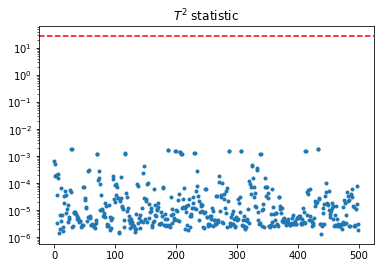

In [35]:
# plotting the result
plt.semilogy(T2_tfinal,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()
# in this scatter plot the data has been use is
# training data it self 

In [36]:
print(f'T2: {(T2_tfinal>T2_trlim).sum()/T2_tfinal.shape[0]}')

T2: 0.0
